In [ ]:
import os
import cv2
from tqdm import tqdm
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
path = r'/content/drive/My Drive/Colab Notebooks/MACS 37000/final project/image_padding/chicago/cropped'
dest = r'/content/drive/My Drive/Colab Notebooks/MACS 37000/final project/image_padding/chicago/padding'

In [ ]:
categories = os.listdir(path)

In [ ]:
width = []
length = []

for c in categories:
  img_dir = os.path.join(path, c)
  for img in tqdm(os.listdir(img_dir)):
    img_arr = cv2.imread(os.path.join(img_dir, img),cv2.IMREAD_COLOR)
    width.append(img_arr.shape[0])
    length.append(img_arr.shape[1])

100%|██████████| 640/640 [05:26<00:00,  1.96it/s]


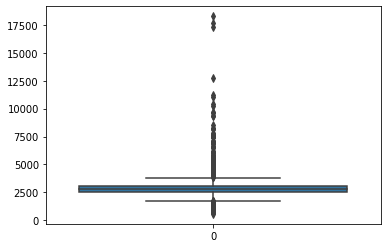

In [ ]:
sns.boxplot(data = width)
plt.show()

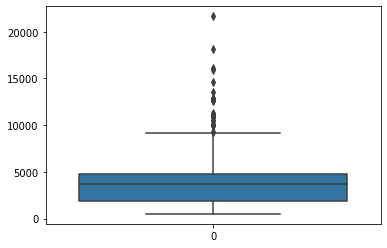

In [ ]:
sns.boxplot(data = length)
plt.show()

In [ ]:
count = 0
for i,w in enumerate(width):
  if w > 11280 or length[i] > 11280:
    count += 1


In [ ]:
count = 0
for i,w in enumerate(width):
  if w <= 11280 and length[i] <= 11280:
    count += 1


In [ ]:
count

783

In [ ]:
158+640-783

15

In [ ]:
max_width = 11280
max_len = 11280

In [ ]:
print(max_width, max_len)

11280 11280


In [ ]:
# max_width = 18288
# max_len = 21653

In [ ]:
for c in categories:
  img_dir = os.path.join(path, c)
  for img in  tqdm(os.listdir(img_dir)):
    png = img.strip('.tif') + '.png'
    if png in os.listdir(os.path.join(dest, c)):
      continue

    img_arr = cv2.imread(os.path.join(img_dir, img), cv2.IMREAD_COLOR)
    if img_arr.shape[0] <= 11280 and img_arr.shape[1] <= 11280:
      pad_width = max_width - img_arr.shape[0]
      pad_len = max_len - img_arr.shape[1]
      padded_img = np.pad(img_arr, pad_width=[(0, pad_width), (0, pad_len),(0, 0)], mode = 'constant')
      folder = os.path.join(dest, c)
      cv2.imwrite(os.path.join(folder, img.strip('.tif')), padded_img)

100%|██████████| 640/640 [25:05<00:00,  2.35s/it]


In [ ]:
len(os.listdir(os.path.join(dest, 'gentrified')))

155

In [ ]:
len(os.listdir(os.path.join(dest, 'non-gentrified')))

628

In [ ]:
for c in categories:
  img_dir = os.path.join(path, c)
  for img in  os.listdir(img_dir):
    print(img)
    break

17031010100.png
17031120100.png


In [ ]:
img_arr = cv2.imread(os.path.join(r'/content/drive/My Drive/Colab Notebooks/MACS 37000/final project/image_padding/chicago/cropped/gentrified', '17031010100.png'), cv2.IMREAD_COLOR)

In [ ]:
img_arr.shape

(1400, 4793, 3)

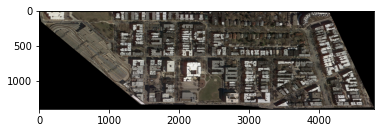

In [ ]:
plt.imshow(cv2.cvtColor(img_arr, cv2.COLOR_BGR2RGB))

In [ ]:
import numpy as np

pad_width = max_width - img_arr.shape[0]
pad_len = max_len - img_arr.shape[1]
padded_img = np.pad(img_arr, pad_width=[(0, pad_width), (0, pad_len),(0, 0)], mode = 'constant')

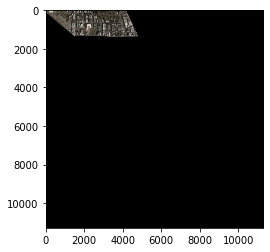

In [ ]:
plt.imshow(cv2.cvtColor(padded_img, cv2.COLOR_BGR2RGB))

In [ ]:
cv2.imwrite('test.png', padded_img)

False

In [ ]:
padded_img.shape

(18288, 21653, 3)